# Figure 3 - User Study

In [3]:
import matplotlib.pyplot as pl
import numpy as np
from collections import Counter

# data collected from mechanical turk
user_results = [
    {"cough_credit": 30, "fever_credit": 30},
    {"cough_credit": 20, "fever_credit": 40},
    {"cough_credit": 30, "fever_credit": 30},
    {"cough_credit": 30, "fever_credit": 30},
    {"cough_credit": 45, "fever_credit": 15},
    {"cough_credit": 20, "fever_credit": 40},
    {"cough_credit": 60, "fever_credit": 20},
    {"cough_credit": 80, "fever_credit": 20},
    {"cough_credit": 40, "fever_credit": 40},
    {"cough_credit": 30, "fever_credit": 30},
    {"cough_credit": 20, "fever_credit": 40},
    {"cough_credit": 20, "fever_credit": 40},
    {"cough_credit": 10, "fever_credit": 50},
    {"cough_credit": 80, "fever_credit": 0},
    {"cough_credit": 40, "fever_credit": 40},
    {"cough_credit": 40, "fever_credit": 20},
    {"cough_credit": 35, "fever_credit": 25},
    {"cough_credit": 30, "fever_credit": 30},
    {"cough_credit": 20, "fever_credit": 40},
    {"cough_credit": 30, "fever_credit": 30},
    {"cough_credit": 30, "fever_credit": 30},
    {"cough_credit": 30, "fever_credit": 30},
    {"cough_credit": 40, "fever_credit": 20},
    {"cough_credit": 20, "fever_credit": 40},
    {"cough_credit": 20, "fever_credit": 40},
    {"cough_credit": 20, "fever_credit": 40},
    {"cough_credit": 30, "fever_credit": 30},
    {"cough_credit": 40, "fever_credit": 20},
    {"cough_credit": 30, "fever_credit": 30},
    {"cough_credit": 30, "fever_credit": 30},
    {"cough_credit": 35, "fever_credit": 25},
    {"cough_credit": 40, "fever_credit": 20},
    {"cough_credit": 60, "fever_credit": 20},
    {"cough_credit": 30, "fever_credit": 30}
]

vals = [str(r["fever_credit"])+"_"+str(r["cough_credit"]) for r in user_results]
c = Counter(vals)
counts = list(c.items())
counts.sort(key=lambda x: -x[1])

### Build the plot

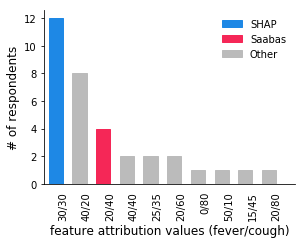

In [8]:
fig, ax = pl.subplots(figsize=(4.5,3.2))

bar_list = pl.bar(np.array(range(len(counts)))*5+2.5, [c[1] for c in counts], width=3)
[x.set_color('#bbbbbb') for x in bar_list]
bar_list[0].set_color('#1E88E5')
bar_list[2].set_color('#F52757')

import matplotlib.patches as mpatches

shap_patch = mpatches.Patch(color='#1E88E5', label='SHAP')
path_patch = mpatches.Patch(color='#F52757', label='Saabas')
other_patch = mpatches.Patch(color='#bbbbbb', label='Other')
pl.legend(handles=[shap_patch,path_patch,other_patch], frameon=False)


pl.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='on') # labels along the bottom edge are off
pl.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left='on',      # ticks along the bottom edge are off
    right='off',         # ticks along the top edge are off
    labelbottom='on') # labels along the bottom edge are off

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
pl.xticks(np.array(range(len(counts)))*5+4, [c[0].replace("_", "/") for c in counts], fontsize=10, rotation='vertical')
pl.ylabel("# of respondents", fontsize=12)
pl.xlabel("feature attribution values (fever/cough)", fontsize=12)
pl.xlim(0,53)
#plt.savefig("tree_max.pdf")
pl.show()